In [2]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import itertools
import math
from matplotlib.colors import LogNorm
import time
from IPython.display import clear_output
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
#data读取　読み取り#+np是削去峰值########
data1=pd.read_csv( 'Si_Thermo_2thome_01np.csv', encoding='shift_jis' , skipinitialspace=True )
data1

,Axis (deg),I(cts)
0,68.5889,23
1,68.5989,25
2,68.6089,28
3,68.6189,20
4,68.6289,39
...,...,...
188,70.5489,143
189,70.5589,117
190,70.5689,115
191,70.5789,109


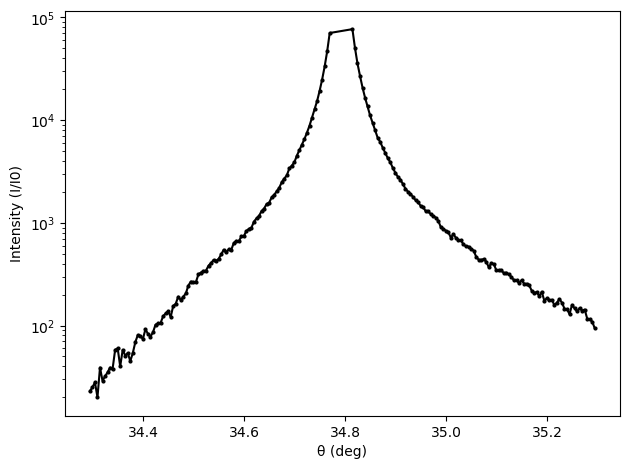

In [4]:
#データをplot-
lam = 1.55  # Å
two_theta = data1.iloc[:,0].to_numpy()   # 2θ       
y_data  = data1.iloc[:,1].to_numpy()  

theta = two_theta / 2.0
q_data = (2*np.pi/lam) * np.sin(np.deg2rad(theta))  # q [1/Å] = (2π/λ) sinθ

plt.plot(theta, y_data, 'ko-', ms=2)  #k，黑色 o显示圆点，实线链接用o-，ms=粗细度  theta---q可以转换
plt.yscale('log')
plt.xlabel('θ (deg)'); plt.ylabel('Intensity (I/I0)')
plt.tight_layout()
plt.show()

In [5]:
y_data

array([   23,    25,    28,    20,    39,    29,    32,    35,    39,
          38,    58,    60,    40,    58,    51,    54,    45,    54,
          69,    81,    79,    74,    92,    83,    78,    86,   102,
         105,   106,   123,   131,   138,   121,   155,   163,   191,
         177,   191,   205,   245,   268,   264,   265,   315,   328,
         340,   343,   383,   406,   435,   425,   446,   492,   547,
         518,   552,   545,   637,   667,   664,   736,   744,   834,
         871,   897,  1028,  1104,  1167,  1299,  1376,  1522,  1568,
        1767,  1871,  2028,  2191,  2484,  2698,  2890,  3384,  3609,
        3887,  4510,  5104,  5771,  6544,  7555,  8827, 10584, 12781,
       15307, 19246, 24825, 33268, 46746, 70446, 76808, 50601, 35621,
       26968, 20757, 16552, 13609, 11100,  9389,  7961,  6731,  6138,
        5388,  4780,  4265,  3889,  3419,  3074,  2801,  2638,  2388,
        2151,  2009,  1910,  1789,  1663,  1591,  1463,  1422,  1300,
        1294,  1216,

In [6]:
q_data

array([2.28402309, 2.28431533, 2.28460756, 2.28489976, 2.28519195,
       2.28548413, 2.28577628, 2.28606842, 2.28636054, 2.28665264,
       2.28694473, 2.2872368 , 2.28752885, 2.28782088, 2.2881129 ,
       2.2884049 , 2.28869688, 2.28898884, 2.28928079, 2.28957272,
       2.28986463, 2.29015652, 2.2904484 , 2.29074026, 2.2910321 ,
       2.29132392, 2.29161573, 2.29190752, 2.29219929, 2.29249105,
       2.29278278, 2.2930745 , 2.2933662 , 2.29365789, 2.29394955,
       2.2942412 , 2.29453284, 2.29482445, 2.29511605, 2.29540763,
       2.29569919, 2.29599073, 2.29628226, 2.29657377, 2.29686526,
       2.29715674, 2.2974482 , 2.29773964, 2.29803106, 2.29832246,
       2.29861385, 2.29890522, 2.29919657, 2.29948791, 2.29977922,
       2.30007052, 2.30036181, 2.30065307, 2.30094432, 2.30123555,
       2.30152676, 2.30181795, 2.30210913, 2.30240029, 2.30269143,
       2.30298256, 2.30327366, 2.30356475, 2.30385583, 2.30414688,
       2.30443792, 2.30472894, 2.30501994, 2.30531092, 2.30560

In [7]:
##################CTR MODEL 04+bg#################

def CTRmodel04( q_data, I0, a, mu, aS, NS ,bg):
    
    exp_sum = 0j+0    
    NS=int(NS)
    for n_ in range(NS+1):
        exp_sum += np.exp( - n_* mu ) * np.exp( 1j * q_data * aS * n_ )
    #
    exp_sum += 1 / ( np.sqrt(2) * np.sin( q_data * a / 2 ) )
    #
    Iq_ = 10**I0 * abs( exp_sum )**2 + bg
    #
    return Iq_

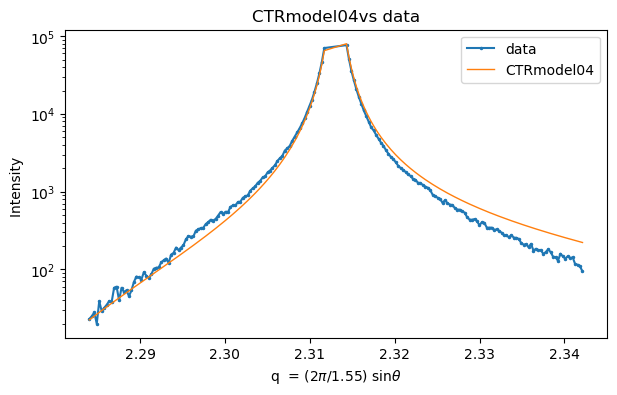

array([2.24072743e+01, 2.36992117e+01, 2.50565401e+01, 2.64822908e+01,
       2.79796629e+01, 2.95520340e+01, 3.12029725e+01, 3.29362501e+01,
       3.47558561e+01, 3.66660119e+01, 3.86711874e+01, 4.07761186e+01,
       4.29858262e+01, 4.53056363e+01, 4.77412027e+01, 5.02985308e+01,
       5.29840039e+01, 5.58044115e+01, 5.87669806e+01, 6.18794089e+01,
       6.51499023e+01, 6.85872142e+01, 7.22006900e+01, 7.60003148e+01,
       7.99967660e+01, 8.42014707e+01, 8.86266691e+01, 9.32854838e+01,
       9.81919964e+01, 1.03361331e+02, 1.08809749e+02, 1.14554748e+02,
       1.20615180e+02, 1.27011372e+02, 1.33765269e+02, 1.40900588e+02,
       1.48442990e+02, 1.56420271e+02, 1.64862579e+02, 1.73802650e+02,
       1.83276080e+02, 1.93321624e+02, 2.03981536e+02, 2.15301951e+02,
       2.27333313e+02, 2.40130867e+02, 2.53755206e+02, 2.68272902e+02,
       2.83757221e+02, 3.00288934e+02, 3.17957257e+02, 3.36860916e+02,
       3.57109381e+02, 3.78824287e+02, 4.02141075e+02, 4.27210903e+02,
      

In [8]:
########### # --- パラメータ---##############
a  = 5.4328       # Å (Si 格子定数)       (5.4328)
aS = 5.5535         # Å (表面层，格子定数 a)(5.528)##5.5445
mu = 7.7598e-6    # 衰减係数              (固定)
NS = 6            # 层数；層数           #################(固定)###########################
I0 = 0.261433     # 振幅标定             (-7.229)
bg = 0           # back ground背景
I_model = CTRmodel04(q_data, I0, a, mu, aS, NS, bg)

################----比较----##################
plt.figure(figsize=(7,4))
plt.plot(q_data, y_data, '.-', ms=3, label='data')
plt.plot(q_data, I_model, '-', lw=1, label='CTRmodel04')
plt.yscale('log')  
plt.xlabel(r'q  = (2$\pi$/1.55) sin$\theta$')
plt.ylabel('Intensity ')
plt.title('CTRmodel04vs data')
plt.legend()
plt.show()
I_model

In [9]:
def CTRmodel04fit(q_data, num_temp, _p_):
    
    _I0_ = _p_[:, 0].reshape(num_temp, 1)
    _a_  = _p_[:, 1].reshape(num_temp, 1)
    _aS_ = _p_[:, 2].reshape(num_temp, 1)
    _bg_ = _p_[:, 3].reshape(num_temp, 1)

    Nq = len(q_data)                           #取 q 轴数据点数 后面要根据这个长度给输出 y 定形。
    y = np.empty((num_temp, Nq), dtype=float)  #一次性预分配结果数组，形状是“链数 × 数据点数”。在内存中开辟一块指定形状和类型的数组空间，但不对其进行初始化。
    #之所以是 (num_temp, Nq)：你的后续能量计算 np.sum(_y_-np.log(_y_)*y, axis=1) 默认每条链在第 0 维，所以要把所有链的曲线叠成一个二维数组。
    
    #  逐链调用你现有的 CTRmodel04（其内部要求 NS 为整数）
    for j in range(num_temp):    #意思：从 j=0 到 j=num_temp-1，逐一取每个“温度副本”。每个副本都有自己的一组参数值（存储在 _I0_, _aS_, _NS_, _bg_ 中）。
        y[j, :] = CTRmodel04(    #对每个副本 j，调用 CTRmodel04 计算它的模型曲线I,得到一个与 q_data 等长的数组；把结果写入 y[j, :]（二维数组的第 j 行）。
            q_data,
            float(_I0_[j, 0]),
            float(_a_[j, 0]),          
            float(mu),                  #固定
            float(_aS_ [j, 0]),
            float(NS),                  #固定
            float(_bg_[j, 0]),
        )
    return y
# 让 update_param_p 里的调用保持不变
def psVfit(q_data, num_temp, _p_):
    return CTRmodel04fit(q_data, num_temp, _p_)

In [10]:
# 擬似フォークト2つによるピークフィット
# メトロポリス法によるパラメータ更新
#ポアソンノイズ
def update_param_p(i,E,n,sigma_R,q_data,y,const,_p_,ratio_p,rslt_p,_rslt_p0_,_rslt_p1_,_rslt_p2_,_rslt_p3_,stepsize_p0,stepsize_p1,stepsize_p2,stepsize_p3,
                _ratio_p_,num_temp,num_para,_p_min_,_p_max_,burn_in_length):
    #num_para = np.size(_p_max_)
    # temp=0はprior（事前分布）に基づいてサンプリング
    _p_[0,0] = (_p_max_[0]-_p_min_[0])*np.random.rand()+_p_min_[0]
    _p_[0,1] = (_p_max_[1]-_p_min_[1])*np.random.rand()+_p_min_[1]
    _p_[0,2] = (_p_max_[2]-_p_min_[2])*np.random.rand()+_p_min_[2]
    _p_[0,3] = (_p_max_[3]-_p_min_[3])*np.random.rand()+_p_min_[3]

    for _ii_ in range(num_para):
        _select_ = np.random.randint(0,num_para,num_temp) #パラメータ間の相関がサンプリングに影響しないようにランダムにパラメータ選択して更新。
        #_select_ = np.int(_ii_)*np.ones(num_temp,dtype="int8") # 順番にパラメータ更新する場合
        _next_p_ = 1*_p_
        for _j_ in range(1,num_temp):# temp=0は別のサンプリングを行う
            _ratio_p_[num_para*_j_+_select_[_j_]] = np.append(_ratio_p_[num_para*_j_+_select_[_j_]],0)
            if(_select_[_j_]==0):
                _next_p_[_j_,0] += stepsize_p0[_j_]*(2*np.random.rand()-1)
            if(_select_[_j_]==1):
                _next_p_[_j_,1] += stepsize_p1[_j_]*(2*np.random.rand()-1)
            if(_select_[_j_]==2):
                _next_p_[_j_,2] += stepsize_p2[_j_]*(2*np.random.rand()-1)
            if(_select_[_j_]==3):
                _next_p_[_j_,3] += stepsize_p3[_j_]*(2*np.random.rand()-1)
            
                
        _y_ = psVfit(q_data,num_temp,_next_p_)
        
        
        # ポアソンノイズ
        next_E = 1/n/sigma_R**2*(np.sum(_y_-np.log(_y_)*y_data,axis=1)+const)
        
        prob = np.exp(-n*temp*(next_E-E)) - np.random.rand(num_temp)
        J = np.where(prob>0)
        for _jj_ in J[0]:
            if(_p_min_[_select_[_jj_]]<= _next_p_[_jj_,_select_[_jj_]]<=_p_max_[_select_[_jj_]]):
                _p_[_jj_,_select_[_jj_]] = _next_p_[_jj_,_select_[_jj_]]
                E[_jj_] = next_E[_jj_]
                if(_jj_>0):
                    (_ratio_p_[num_para*_jj_+_select_[_jj_]])[-1] +=1#採択率についての履歴を残す
                if(i>burn_in_length):
                    ratio_p[_jj_,_select_[_jj_]] += 1#採択率そのもの
        rslt_p[_select_[num_temp-1]] = np.append(rslt_p[_select_[num_temp-1]],_p_[num_temp-1,_select_[num_temp-1]])#最低温の履歴
        for _kk_ in range(1,num_temp):#全レプリカのサンプリング履歴を残す
            if(_select_[_kk_]==0):
                _rslt_p0_[_kk_] = np.append(_rslt_p0_[_kk_],_p_[_kk_,0])
            if(_select_[_kk_]==1):
                _rslt_p1_[_kk_] = np.append(_rslt_p1_[_kk_],_p_[_kk_,1])
            if(_select_[_kk_]==2):
                _rslt_p2_[_kk_] = np.append(_rslt_p2_[_kk_],_p_[_kk_,2])
            if(_select_[_kk_]==3):
                _rslt_p3_[_kk_] = np.append(_rslt_p3_[_kk_],_p_[_kk_,3])
            
        
    #temp=0は必ず更新
    E[0] = next_E[0]
    ratio_p[0,:] = 0
    _rslt_p0_[0] = np.append(_rslt_p0_[0],_p_[0,0])
    _rslt_p1_[0] = np.append(_rslt_p1_[0],_p_[0,1])
    _rslt_p2_[0] = np.append(_rslt_p2_[0],_p_[0,2])
    _rslt_p3_[0] = np.append(_rslt_p3_[0],_p_[0,3])
    return E

In [11]:
NS

6

In [12]:
y_data

array([   23,    25,    28,    20,    39,    29,    32,    35,    39,
          38,    58,    60,    40,    58,    51,    54,    45,    54,
          69,    81,    79,    74,    92,    83,    78,    86,   102,
         105,   106,   123,   131,   138,   121,   155,   163,   191,
         177,   191,   205,   245,   268,   264,   265,   315,   328,
         340,   343,   383,   406,   435,   425,   446,   492,   547,
         518,   552,   545,   637,   667,   664,   736,   744,   834,
         871,   897,  1028,  1104,  1167,  1299,  1376,  1522,  1568,
        1767,  1871,  2028,  2191,  2484,  2698,  2890,  3384,  3609,
        3887,  4510,  5104,  5771,  6544,  7555,  8827, 10584, 12781,
       15307, 19246, 24825, 33268, 46746, 70446, 76808, 50601, 35621,
       26968, 20757, 16552, 13609, 11100,  9389,  7961,  6731,  6138,
        5388,  4780,  4265,  3889,  3419,  3074,  2801,  2638,  2388,
        2151,  2009,  1910,  1789,  1663,  1591,  1463,  1422,  1300,
        1294,  1216,

In [39]:
# メインのプログラム
#_sigma_R_ = 0.02/2 # ノイズ推定用の計算範囲を決めるため、予想されるノイズ標準偏差よりも小さい値を入れる。ノイズ推定をしない場合は真値を入れる。
_sigma_R_ = 1 #ポアソンの場合
_dir_ = "1106解析ns06_006"# 解析結果の保存先フォルダ名を入力
os.mkdir(_dir_) # 保存先フォルダを作成。（フォルダが既に存在する場合はエラーとなる。）

# 初期値を事前分布から生成するか？
ini_pri = 1 # 1:生成する 0:生成しない（ハイパーパラメータ調整時以外は事前分布から生成する。）

np.random.seed(seed=1)# 解析結果に再現性を持たせるため乱数のseedを設定。

num_para = 4 # パラメータ数を入力

# stepsizeの調整
_st_p0_ = 4e-1    #I0
_st_p1_ = 1e-2    #a
_st_p2_ = 3e-1    #aS
_st_p3_ = 2       #Bg

scale_d = 1   ##1
_d_p0_ = 0.5*scale_d
_d_p1_ = 0.5*scale_d
_d_p2_ = 0.5*scale_d
_d_p3_ = 0.9*scale_d

_alpha_p0_ = 10**(5.0)
_alpha_p1_ = 10**(6.3)
_alpha_p2_ = 10**(4.2)##4##5
_alpha_p3_ = 10**(1.7)

# 解析条件を設定
cycle =      20000     #20000#50000 #繰り返し回数
num_temp =   50       #逆温度の個数、偶数で設定
proportion = 1.4      #逆温度を生成する際の等比係数
burn_in_length = 5000  #5000#20000 #焼きなましの繰り返し回数

n = np.size(y_data)#########
ratio_p0 = np.zeros(num_temp)
ratio_p1 = np.zeros(num_temp)
ratio_p2 = np.zeros(num_temp)
ratio_p3 = np.zeros(num_temp)

ratio_temp = np.zeros(num_temp)
mean_E = np.zeros(num_temp)

# 初期値を設定（ハイパーパラメータ調整を行うときはプレフィットの値を入れる）
initial_p0 = 0.2    #I0
initial_p1 = 5.43   #a
initial_p2 = 5.55   #aS
initial_p3 = 1      #bg


initial_p = np.ones(num_para)#パラメータ数の空箱を作る
initial_p[0] = initial_p0
initial_p[1] = initial_p1
initial_p[2] = initial_p2
initial_p[3] = initial_p3

# 各パラメータの範囲を事前分布として設定。
min_p0 = 0.01
max_p0 = 0.50
min_p1 = 5.35
max_p1 = 5.50
min_p2 = 5.50
max_p2 = 5.80
min_p3 = 0.00
max_p3 = 2.0

_p_max_ = np.array([max_p0,max_p1,max_p2,max_p3])
_p_min_ = np.array([min_p0,min_p1,min_p2,min_p3])
ratio_p = np.zeros((num_temp,np.size(_p_max_)))
rslt_p = [initial_p0,initial_p1,initial_p2,initial_p3]

# tempの生成 b=temp/sigma**2 : ノイズ推定を行う場合
_sigma_ = _sigma_R_#予測されるσよりも小さな値を入れる
sigma_R = 1 # ここを1とすることでtempにまとめる
temp = np.array([proportion**(j-num_temp+1)/_sigma_**2 for j in range(num_temp)])

# tempの生成 β=temp：ノイズ推定を行わない場合
#temp = np.array([proportion**(j-num_temp+1) for j in range(num_temp)])
#sigma_R = _sigma_R_ # sigma_Rにノイズ分散の真値を入れる

# stepsizeの生成 分岐点の情報をαとして入れる
stepsize_p0 = np.where(temp<=1/_alpha_p0_,_st_p0_,_st_p0_/(_alpha_p0_*temp)**_d_p0_)
stepsize_p1 = np.where(temp<=1/_alpha_p1_,_st_p1_,_st_p1_/(_alpha_p1_*temp)**_d_p1_)
stepsize_p2 = np.where(temp<=1/_alpha_p2_,_st_p2_,_st_p2_/(_alpha_p2_*temp)**_d_p2_)
stepsize_p3 = np.where(temp<=1/_alpha_p3_,_st_p3_,_st_p3_/(_alpha_p3_*temp)**_d_p3_)

temp[0] = 0
stepsize_p0[0] = _st_p0_
stepsize_p1[0] = _st_p1_
stepsize_p2[0] = _st_p2_
stepsize_p3[0] = _st_p3_


# プレフィット結果を初期値とする場合（ハイパーパラメータ調整を行う時のみ）
p0 = initial_p0*np.ones(num_temp)
p1 = initial_p1*np.ones(num_temp)
p2 = initial_p2*np.ones(num_temp)
p3 = initial_p3*np.ones(num_temp)

_p_ = np.ones(num_temp).reshape(num_temp,1)*initial_p

# 初期値を事前分布から乱数生成する場合
if(ini_pri==1):
    _p_ = np.zeros((num_temp,np.size(_p_max_)))
    _p_[:,0] = (_p_max_[0]-_p_min_[0])*np.random.rand(num_temp)+_p_min_[0]
    _p_[:,1] = (_p_max_[1]-_p_min_[1])*np.random.rand(num_temp)+_p_min_[1]
    _p_[:,2] = (_p_max_[2]-_p_min_[2])*np.random.rand(num_temp)+_p_min_[2]
    _p_[:,3] = (_p_max_[3]-_p_min_[3])*np.random.rand(num_temp)+_p_min_[3]
    
_y_ = psVfit(q_data,num_temp,_p_)

# ポアソンノイズ
const = 0
for i_y in range(np.size(y_data)):
    for j_y in range(int(y_data[i_y])):#####gai
        const = const + np.log(j_y+1)
E = 1/n/sigma_R**2*(np.sum(_y_-np.log(_y_)*y_data,axis=1)+const)

E_ini = E[0]
_E_ = 1*E
_mean_E_ = 1*E
_rslt_p_ = 1*_p_
_rslt_p0_ = list(_p_[:,0])
_rslt_p1_ = list(_p_[:,1])
_rslt_p2_ = list(_p_[:,2])
_rslt_p3_ = list(_p_[:,3])

_ratio_p_ = list(np.ones(np.size(_p_max_)*num_temp))
_optimal_ = list((_p_.reshape(np.size(_p_max_)*num_temp,1))[:,0])
_optimal_E_ = 1*E
_p_all_ = 1*(_p_.reshape(1,num_temp*np.size(_p_max_)))[0]

st = time.time()
for i in range(cycle):
    #配列は関数中で更新されるため取り出すのはEのみ
    E = update_param_p(i,E,n,sigma_R,q_data,y_data,const,_p_,ratio_p,rslt_p,_rslt_p0_,_rslt_p1_,_rslt_p2_,_rslt_p3_,stepsize_p0,stepsize_p1,stepsize_p2,stepsize_p3,_ratio_p_,num_temp,num_para,_p_min_,_p_max_,burn_in_length)

    _p_all_ = np.append(_p_all_,1*(_p_.reshape(1,num_temp*np.size(_p_max_)))[0])

    if(i>burn_in_length):
        mean_E += E
    _mean_E_ = np.append(_mean_E_,E)

    #Exchange_Process
    eo = np.mod(i,2)
    if(eo==0):
        prob = np.exp(n*(temp[eo+1::2]-temp[eo::2])*(E[eo+1::2]-E[eo::2])) - np.random.rand(int(num_temp/2))
        J = 2*np.array(np.where(prob>0))
    else:
        prob = np.exp(n*(temp[eo+1:num_temp-1:2]-temp[eo:num_temp-1:2])*(E[eo+1:num_temp-1:2]-E[eo:num_temp-1:2])) - np.random.rand(int(num_temp/2)-1)
        J = 2*np.array(np.where(prob>0))+1
    if(i>burn_in_length):
        ratio_temp[J] += 1
    for j in J[0]:
        s = 1*_p_[j,:] # 参照を切るために1をかける
        _p_[j,:] = _p_[j+1,:]
        _p_[j+1,:] = s                

    s = E[J]
    E[J] = E[J+1]
    E[J+1] = s
    # judge_optimal => ノイズ推定時どのレプリカが正解か確定しないので、Eの履歴を残して後から解析する
    _E_ = np.append(_E_,E)
    for j in range(np.size(_p_max_)*num_temp):
        if(i==0):
            _optimal_[j] = np.append(_optimal_[j],(_optimal_[j]))
        if(i>0):
            _optimal_[j] = np.append(_optimal_[j],(_optimal_[j])[-1]) 
    del_E = _optimal_E_ - E
    J = np.where(del_E>0)
    _optimal_E_[J] = 1*E[J]
    for j in J[0]:
        for k in range(np.size(_p_max_)):
            (_optimal_[j*np.size(_p_max_)+k])[-1] = _p_[j,k]

    if(np.mod(i+1,10)==0):
        print(i+1,time.time()-st)
        np.save(_dir_+"/ratio_p.npy",ratio_p)
        np.save(_dir_+"/ratio_temp.npy",ratio_temp)
        np.save(_dir_+"/mean_E.npy",mean_E)
        np.save(_dir_+"/_rslt_p0_.npy", np.array(_rslt_p0_, dtype=object), allow_pickle=True)
        np.save(_dir_+"/_rslt_p1_.npy", np.array(_rslt_p1_, dtype=object), allow_pickle=True)
        np.save(_dir_+"/_rslt_p2_.npy", np.array(_rslt_p2_, dtype=object), allow_pickle=True)
        np.save(_dir_+"/_rslt_p3_.npy", np.array(_rslt_p3_, dtype=object), allow_pickle=True)
        
        np.save(_dir_+"/_E_.npy",_E_)
        np.save(_dir_+"/_p_all_.npy",_p_all_)
        np.save(_dir_+"/_mean_E_.npy",_mean_E_)
        np.save(_dir_+"/_ratio_p_.npy", np.array(_ratio_p_, dtype=object), allow_pickle=True)
        np.save(_dir_+"/_optimal_.npy", np.array(_optimal_, dtype=object), allow_pickle=True)

print(time.time()-st)

10 0.16133928298950195
20 0.3267037868499756
30 0.49012136459350586
40 0.6505799293518066
50 0.8115537166595459
60 0.9746942520141602
70 1.1332676410675049
80 1.2886643409729004
90 1.4862236976623535
100 1.648655652999878
110 1.8159408569335938
120 1.98606276512146
130 2.152268409729004
140 2.3246419429779053
150 2.494464874267578
160 2.67283034324646
170 2.839501142501831
180 3.0041825771331787
190 3.1779017448425293
200 3.3402814865112305
210 3.5173702239990234
220 3.6741671562194824
230 3.838841199874878
240 4.001695156097412
250 4.175652742385864
260 4.337870836257935
270 4.5069544315338135
280 4.667941093444824
290 4.842487096786499
300 5.006243467330933
310 5.203461408615112
320 5.3700878620147705
330 5.54622745513916
340 5.721698045730591
350 5.890963554382324
360 6.065979719161987
370 6.237813234329224
380 6.4081807136535645
390 6.58458948135376
400 6.751692771911621
410 6.9380998611450195
420 7.1058900356292725
430 7.282904386520386
440 7.452666997909546
450 7.626832723617554


In [40]:
_dir_

'1106解析ns06_006'

おおむね0.2から0.8の間に収まっていれば成功。


<Figure size 2400x1200 with 0 Axes>

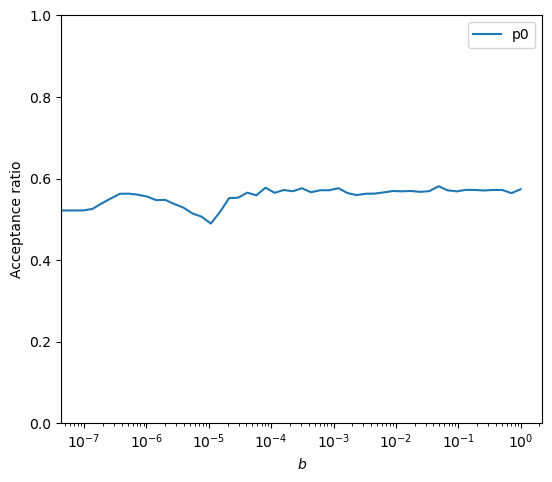

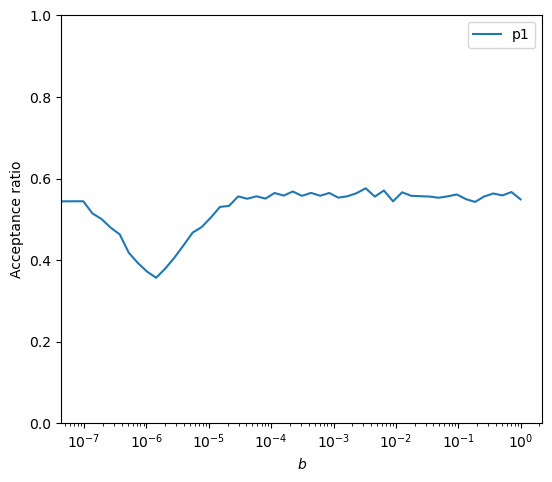

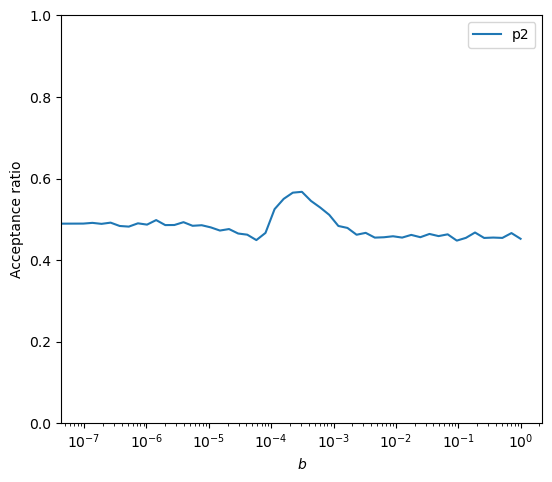

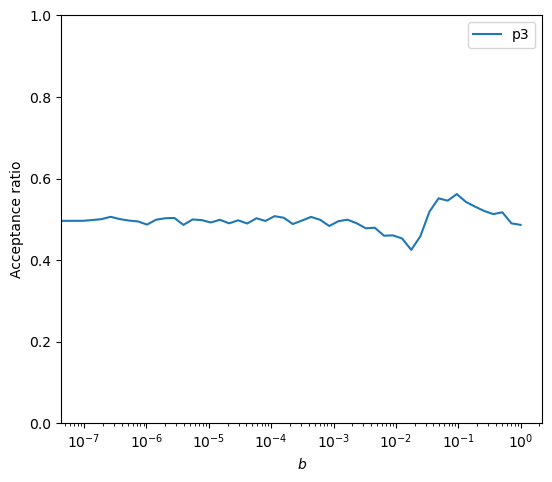

In [41]:
# 採択率のプロット
ratio_p = np.load(_dir_+"/ratio_p.npy")
print("おおむね0.2から0.8の間に収まっていれば成功。")
plt.figure(figsize=(24,12))
for i in range(num_para):
    plt.figure(figsize=(36,18))
    plt.subplot(3,5,i+1)
    plt.plot(temp,ratio_p[:,i]/(cycle-burn_in_length),label="p{}".format(i))
    plt.xscale("log")
    plt.ylim(0,1)
    plt.xlabel("$b$")
    plt.ylabel("Acceptance ratio") 
    plt.legend()
    plt.show()

収束するまでの焼きなまし区間(burn_in)が十分か確認する。


<Figure size 2400x1000 with 0 Axes>

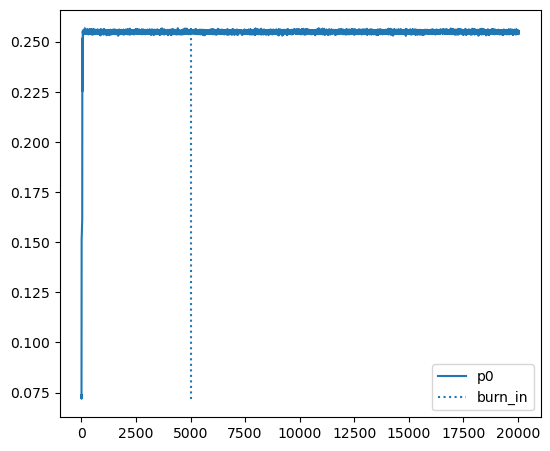

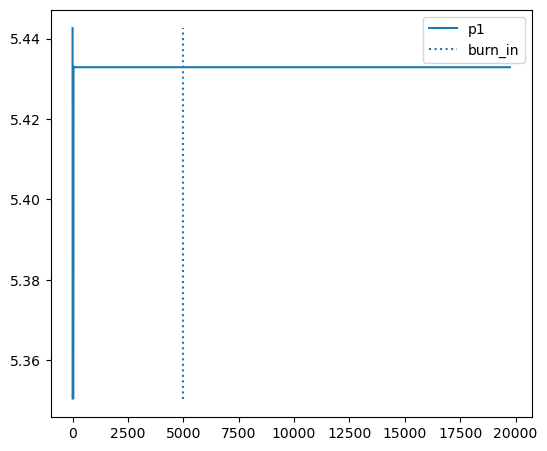

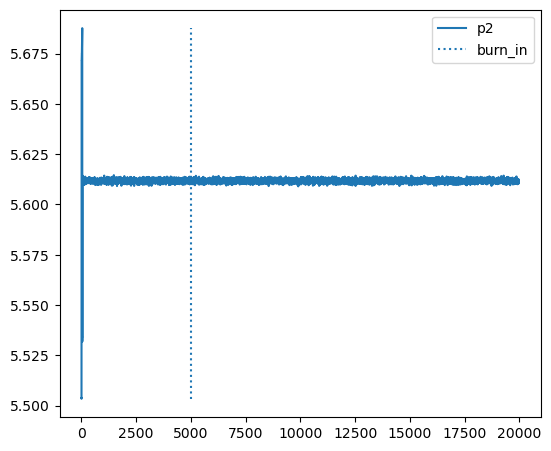

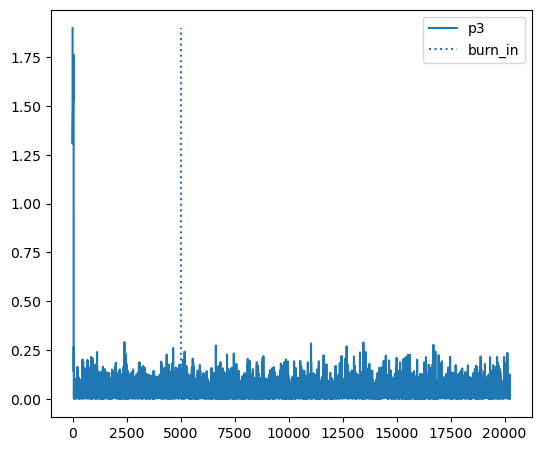

In [42]:
# 各パラメータの採択履歴をプロット
print("収束するまでの焼きなまし区間(burn_in)が十分か確認する。")
i = 49 # 履歴を確認したいレプリカのインデックス（逆温度の数が50の時は0から49までの番号）を入れる
plt.figure(figsize=(24,10))
for j in range(num_para):
    plt.figure(figsize=(36,18))
    _pp_ = np.load(_dir_+"/_rslt_p{}_.npy".format(j), allow_pickle=True)
    plt.subplot(3,5,j+1)
    plt.plot(_pp_[i],label="p{}".format(j))
    plt.vlines(burn_in_length,np.min(_pp_[i]),np.max(_pp_[i]),label="burn_in",linestyle="dotted")
    plt.legend()
    plt.show()

最高温度のレプリカ(b=0)との交換率(右の値がゼロで無いことを確認) 0.32893333333333336


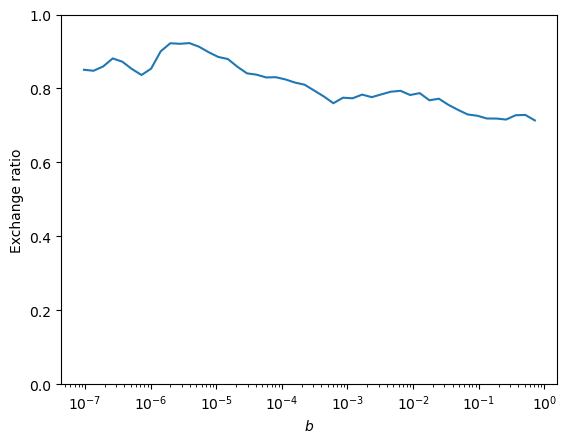

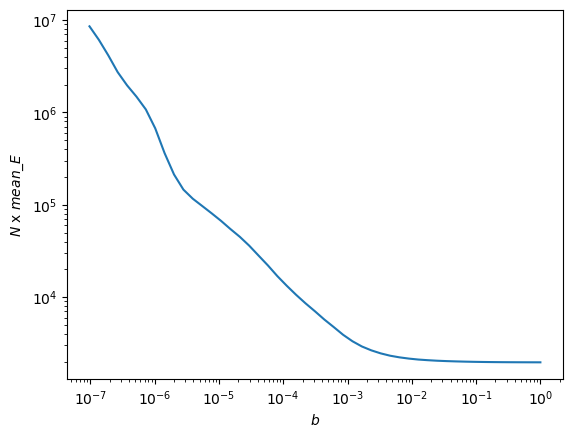

In [43]:
# レプリカ交換率とmean_Eのプロット
ratio_temp = np.load(_dir_+"/ratio_temp.npy")
mean_E = np.load(_dir_+"/mean_E.npy")
print("最高温度のレプリカ(b=0)との交換率(右の値がゼロで無いことを確認)",ratio_temp[0]/((cycle-burn_in_length)/2))
_ratio_temp_ = np.zeros((num_temp,2))
_ratio_temp_[:,0] = 1*temp
_ratio_temp_[:,1] = 1*ratio_temp/((cycle-burn_in_length)/2)
_mean_E_ = np.zeros((num_temp,2))
_mean_E_[:,0] = 1*temp
_mean_E_[:,1] = 1*mean_E/(cycle-burn_in_length)

plt.plot(temp[1:num_temp-1],ratio_temp[1:num_temp-1]/((cycle-burn_in_length)/2))
plt.xscale("log")
plt.xlabel("$b$")
plt.ylabel("Exchange ratio")
plt.ylim(0,1)
plt.show()
plt.plot(temp[1:num_temp],n*mean_E[1:num_temp]/(cycle-burn_in_length))
plt.xlabel("$b$")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("$N$ x $mean$_$E$")
plt.show()

自由エネルギーの最小値 0.8304499646317137
推定されたノイズの標準偏差 3214.199700417736
最適な逆温度のインデックス 1


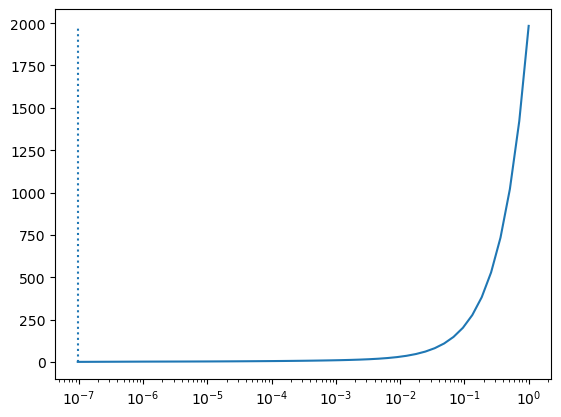

In [44]:
# ノイズ推定
F = []
for i in range(1,num_temp):
    A = 0
    for j in range(i):
        A += (temp[j+1] - temp[j])*mean_E[j+1]/(cycle-burn_in_length)*n
    F = np.append(F,A) #- n/2*(np.log(temp[i])-np.log(2*np.pi)))
plt.plot(temp[1:num_temp],F)
plt.xscale("log")
plt.vlines(temp[np.argmin(F)+1],np.min(F),np.max(F),linestyle="dotted")
#plt.yscale("log")
#plt.ylim(-200,500)
print("自由エネルギーの最小値",np.min(F))
print("推定されたノイズの標準偏差",1/(temp[np.argmin(F)+1])**0.5)
print("最適な逆温度のインデックス",np.argmin(F)+1)
plt.show()

In [45]:
F[48]

np.float64(1983.6799022810094)

In [46]:
NS

6

<Figure size 2400x1000 with 0 Axes>

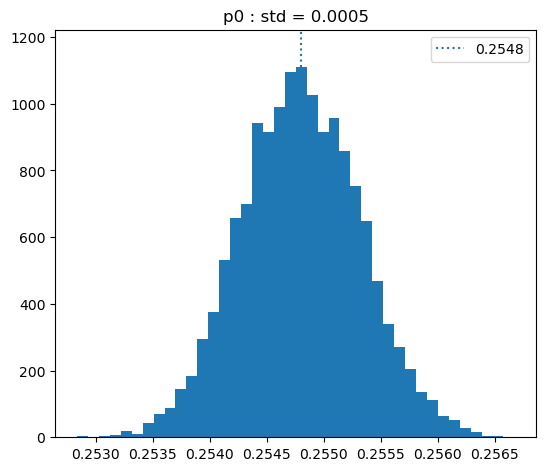

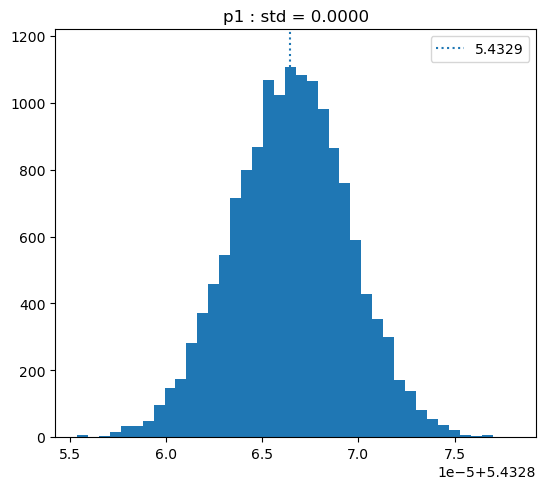

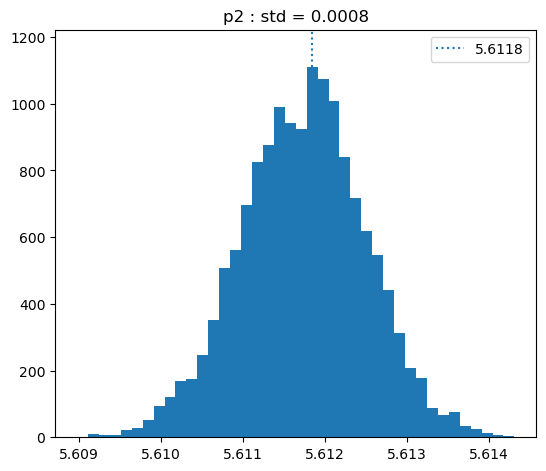

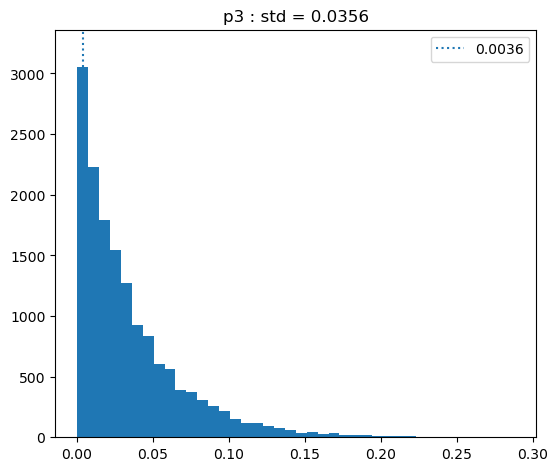

In [47]:
# 事後確率分布をプロット
i = np.argmin(F)+1 # ノイズ推定で得られた最適な逆温度のインデックスが入る
i = 49#ポアソン
_pp_MPM_ = np.zeros(num_para)
plt.figure(figsize=(24,10))
for j in range(num_para):
    plt.figure(figsize=(36,18))
    _pp_ = np.load(_dir_+"/_rslt_p{}_.npy".format(j), allow_pickle=True)
    plt.subplot(3,5,j+1)
    plt.title("p{} : std = {:.4f}".format(j,np.std((_pp_[i])[burn_in_length::])))
    plt.hist((_pp_[i])[burn_in_length::],bins=40)
    _pp_hist_ = np.histogram((_pp_[i])[burn_in_length::],bins=40)
    _pp_MPM_[j] = ((_pp_hist_[1])[np.argmax(_pp_hist_[0])+1]+(_pp_hist_[1])[np.argmax(_pp_hist_[0])])/2
    plt.vlines(_pp_MPM_[j],0,1.1*np.max(_pp_hist_[0]),linestyle="dotted",label="{:.4f}".format(_pp_MPM_[j]))
    plt.ylim(0,1.1*np.max(_pp_hist_[0]))
    plt.legend()
    plt.show()

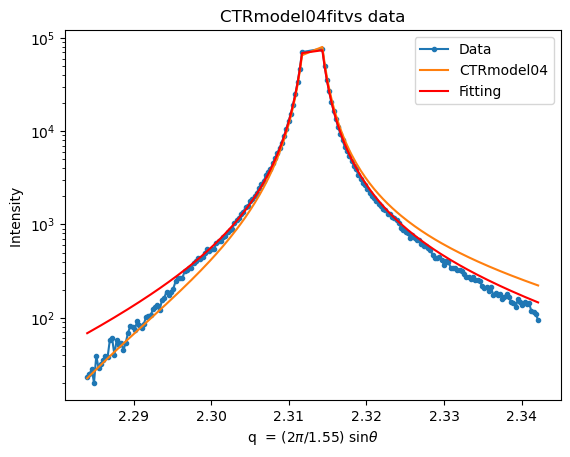

In [48]:
# パラメータごとの事後確率分布の最大値を用いたMPM(maximizer of the posterior marginal)推定によるフィッティング結果
I0  = _pp_MPM_[0]
a   = _pp_MPM_[1]
aS  = _pp_MPM_[2]
bg  = _pp_MPM_[3]
NS = NS 
_y_ = CTRmodel04( q_data, I0, a, mu, aS, NS, bg )

plt.yscale('log') 
plt.xlabel(r'q  = (2$\pi$/1.55) sin$\theta$')
plt.ylabel('Intensity ')
plt.title('CTRmodel04fitvs data')
plt.plot(q_data,y_data,".-",label="Data")
plt.plot(q_data, I_model, '-', label='CTRmodel04')
plt.plot(q_data,_y_,color="r",label="Fitting")
plt.legend()
plt.show()
#plt.xlim(np.max(x),np.min(x))

In [49]:
_pp_MPM_

array([2.54801928e-01, 5.43286646e+00, 5.61184253e+00, 3.60562797e-03])

In [50]:
NS

6

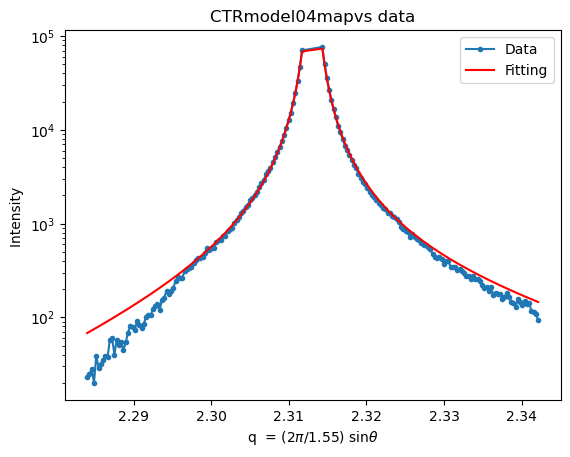

In [51]:
# MAP推定結果
_opt_j_ = 49
num_para = np.size(_p_max_)
I0 = (_optimal_[num_para*_opt_j_])[cycle]
a  = (_optimal_[num_para*_opt_j_+1])[cycle]
aS = (_optimal_[num_para*_opt_j_+2])[cycle]
bg = (_optimal_[num_para*_opt_j_+3])[cycle]
NS = NS

y_map = CTRmodel04( q_data, I0, a, mu, aS, NS, bg )

plt.xlabel(r'q  = (2$\pi$/1.55) sin$\theta$')
plt.ylabel('Intensity ')
plt.title('CTRmodel04mapvs data')
plt.yscale('log') 
plt.plot(q_data,y_data,".-",label="Data")
#plt.plot(q_data, I_model, '-', label='CTRmodel04')
plt.plot(q_data,y_map,color="r",label="Fitting")
plt.legend()
plt.show()
#plt.plot(x,model_int,label="Model")